**Decision Tree**

In [ ]:
#import module
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

**Kategorisasi**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_cleveland_upload.csv')
dataset['age']=pd.cut(dataset['age'],
                      bins = [23,29,34.3,39.6,44.9,50.2,55.4,60.7,66,71.3,76.6,81.9],
                      labels = ['29','34.3','39.6','44.9','50.2','55.4','60.7','66','71.3','76.6','81.9'])
dataset['sex']=pd.cut(dataset['sex'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['cp']=pd.cut(dataset['cp'],
                      bins = [-1,0,1,2,3],
                      labels = ['0','1','2','3'])
dataset['trestbps']=pd.cut(dataset['trestbps'],
                      bins = [82.3,94,105.7,117.4,129,140.7,152.4,164.1,175.7,187.4,199.1,210.8],
                      labels = ['94','105.7','117','129','140.7','152.4','164.1','175.7','187.4','199.1','210.8'])
dataset['chol']=pd.cut(dataset['chol'],
                      bins = [77.7,126,174.3,222.5,270.8,319,367.3,415.5,463.8,608.5],
                      labels = ['126','174.3','222.5','270.8','319','367.3','415.5','463.8','608.5'])
dataset['fbs']=pd.cut(dataset['fbs'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['restecg']=pd.cut(dataset['restecg'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['thalach']=pd.cut(dataset['thalach'],
                      bins = [56.6,71,85.4,99.9,114.3,128.7,143.2,157.6,172,186.5,200.9,215.3],
                      labels = ['71','85.4','99.9','114.3','128.7','143.2','157.6','172','186.5','200.9','215.3'])
dataset['exang']=pd.cut(dataset['exang'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['oldpeak']=pd.cut(dataset['oldpeak'],
                      bins = [-1,0.7,1.4,2,2.7,3.4,4.1,4.8,6.1,6.8],
                      labels = ['0.7','1.4','2','2.7','3.4','4.1','4.8','6.1','6.8'])
dataset['slope']=pd.cut(dataset['slope'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['ca']=pd.cut(dataset['ca'],
                      bins = [-1,0,1,2,3],
                      labels = ['0','1','2','3'])
dataset['thal']=pd.cut(dataset['thal'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['condition']=pd.cut(dataset['condition'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,71.3,1,0,164.1,270.8,1,2,143.2,0,0.7,1,1,0,0
1,71.3,0,0,140.7,270.8,0,0,157.6,0,2,0,2,0,0
2,66,0,0,152.4,270.8,0,0,114.3,0,2.7,2,0,0,0
3,66,1,0,140.7,319,1,2,186.5,0,1.4,1,1,0,1
4,66,1,0,117,222.5,0,2,157.6,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,44.9,1,3,152.4,270.8,0,0,186.5,0,0.7,0,0,2,1
293,39.6,1,3,129,222.5,0,0,143.2,0,1.4,1,0,2,1
294,39.6,1,3,129,222.5,0,0,143.2,1,2,1,0,2,1
295,39.6,0,3,140.7,222.5,0,0,186.5,0,1.4,0,0,0,0


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
feature_cols =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X = dataset[feature_cols]  # feature vector
Y = dataset['condition']    # label vector

print(X.dtypes)

age         category
sex         category
cp          category
trestbps    category
chol        category
fbs         category
restecg     category
thalach     category
exang       category
oldpeak     category
slope       category
ca          category
thal        category
dtype: object


In [ ]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=5)
c50_01=clf.fit(X_train, Y_train)
clf_predictions = c50_01.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, clf_predictions)*100)

Accuracy:  80.0


In [ ]:
print(confusion_matrix(Y_test, clf_predictions))
print(classification_report(Y_test,clf_predictions))

[[15  2]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.82      0.69      0.75        13

    accuracy                           0.80        30
   macro avg       0.80      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30



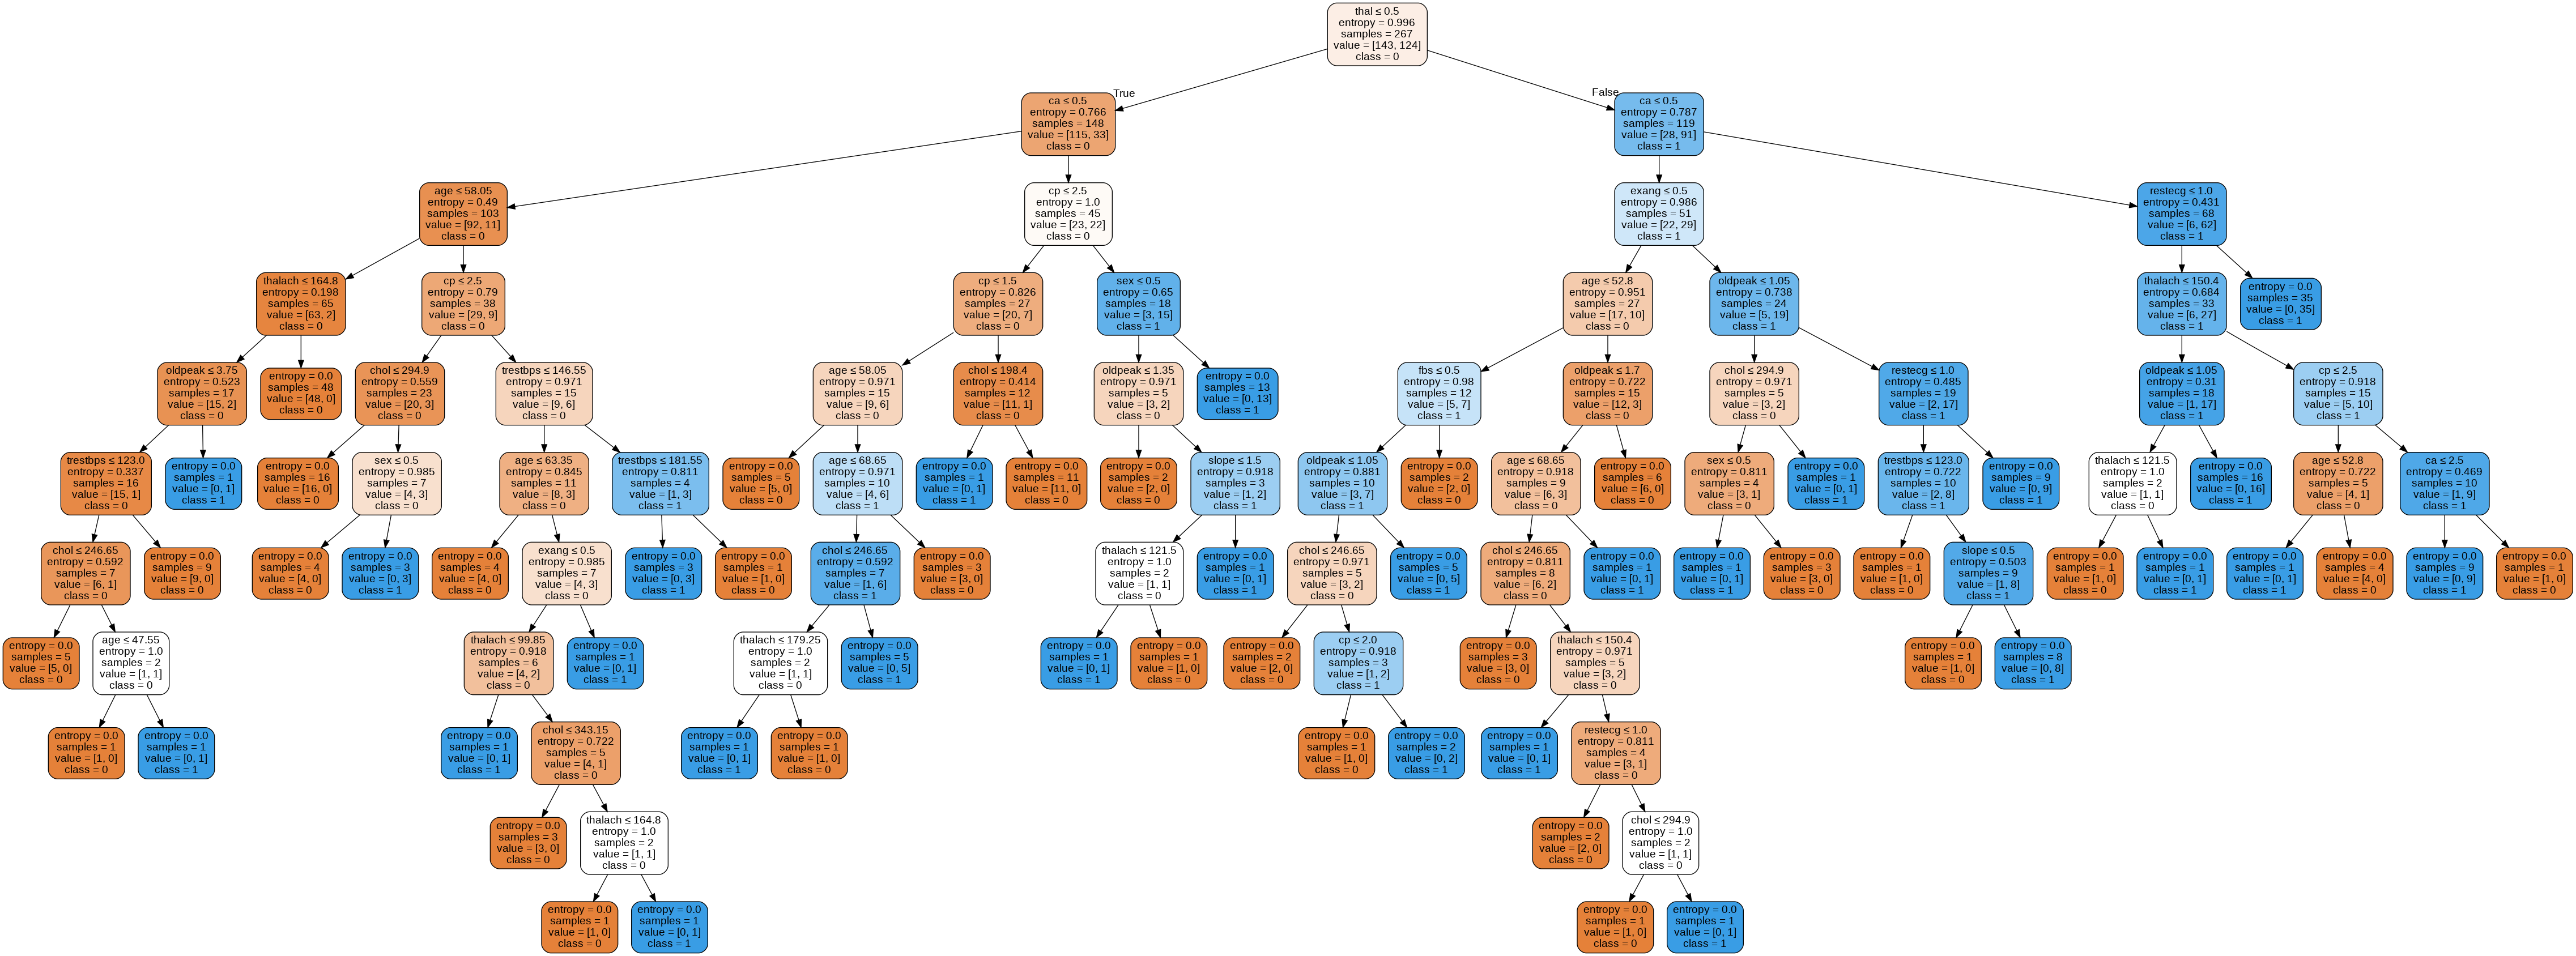

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(c50_01, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jantung.png')
Image(graph.create_png())

**Decision Tree + PSO**

In [ ]:
!pip install pyswarms

In [ ]:
#import module
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pyswarms as ps
import time as time
from sklearn.tree import DecisionTreeClassifier

**PSO + Decision Tree**

In [ ]:
#import dataset
clf = DecisionTreeClassifier(criterion="entropy")
X = np.array(dataset.drop(['condition'],1))   # feature vector
Y = np.array(dataset['condition'])    # label vector
print(X.shape)

(297, 13)


In [ ]:
def f_per_particle(m, alpha):
  total_features = nfitur

  #proses seleksi fitur PSO
  if np.count_nonzero(m) == 0:
    X_subset = X
  else:
    X_subset = X[:, m==1]
  X_train, X_test, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.1, random_state=5, shuffle = True)
  c50_01=clf.fit(X_train, Y_train)
  P = (c50_01.predict(X_test) == Y_test).mean()
  j = (alpha * (1.0-P)+(1.0-alpha)*(1-(X_subset.shape[1]/total_features)))
  return j

In [ ]:
def f(x, alpha = 0.88):
  n_particles = x.shape[0]
  j =[f_per_particle(x[i], alpha) for i in range(n_particles)]
  return np.array(j)

options = {'c1':0.5, 'c2': 0.5, 'w':0.9, 'k':30, 'p':2}
nsample, nfitur = X.shape
dimensions = nfitur
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters = 100)

2021-10-28 06:39:13,076 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0755
2021-10-28 06:39:19,564 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.07548717948717948, best pos: [1 0 1 1 0 0 1 0 1 1 0 1 1]


In [ ]:
X_selected_features = X[:,pos==1]
X_train, X_test, Y_train, Y_test = train_test_split(X_selected_features, Y, test_size=0.1, random_state=5, shuffle = True)
c50_01=clf.fit(X_train,Y_train)
subset_performance = (c50_01.predict(X_test) == Y_test).mean()

In [ ]:
#akurasi yang diperoleh
print('Akurasi: %.3f' % (subset_performance))

Akurasi: 0.967
